#反傾銷案件數

###研究問題
反傾銷案件和GDP Growth關係

###研究方法

*   資料來源：WTO's Data Portal http://data.wto.org

*   變數定義：anti_amount 反傾銷件數 gdp_amount

*   主要觀察國家：China, European Union, India, United States (of America).



###數據分析

*   資料視覺化

*   實證模型

*   結果解釋：各國每年反傾銷案件增多或減少與GDP成長並無太大關係。

### 程式碼

##ADP

In [1]:
!pip install xlrd

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

excel_data_url = "WtoData_20190104130630.xlsx"
ADP = pd.read_excel(excel_data_url, usecols="A:J", skiprows=2, nrows=44)
ADP.head()

,Reporting Economy,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Argentina,71,86,85,84,85,79,85,84,86
1,Australia,27,21,23,33,40,51,56,54,65
2,Brazil,65,71,81,89,108,128,157,162,169
3,Canada,35,35,36,45,48,53,65,66,76
4,Chile,1,1,0,1,0,0,0,1,2


In [39]:
ADP.shape

(41, 10)

In [40]:
ADP = pd.melt(ADP,id_vars=["Reporting Economy"], value_vars=["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], var_name='year', value_name='anti')
ADP

,Reporting Economy,year,anti
0,Argentina,2009,71
1,Australia,2009,27
2,Brazil,2009,65
3,Canada,2009,35
4,Chile,2009,1
5,China,2009,105
6,Colombia,2009,13
7,Costa Rica,2009,2
8,Czech Republic,2009,0
9,Dominican Republic,2009,0


In [41]:
year = ADP.groupby("year")
anti_sum_ser = year["anti"].sum().sort_values(ascending=False)
anti_sum_ser.values

array([1732, 1613, 1537, 1445, 1407, 1335, 1334, 1314, 1305])

In [42]:
anti_sum_ser.index

Index(['2017', '2016', '2015', '2014', '2013', '2010', '2012', '2011', '2009'], dtype='object', name='year')

In [43]:
print ("Max value element")
max(anti_sum_ser)

Max value element


1732

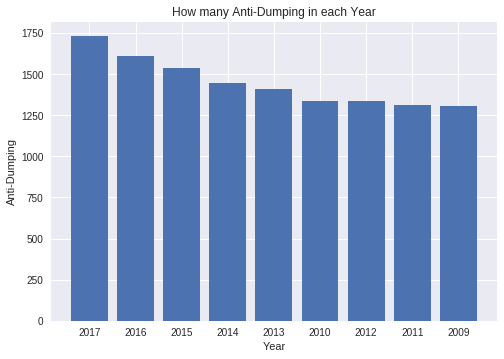

In [44]:
anti_amount = len(anti_sum_ser.values)
plt.bar(range(anti_amount), anti_sum_ser.values)
plt.xticks(range(anti_amount), anti_sum_ser.index)
plt.title("How many Anti-Dumping in each Year")
plt.xlabel("Year")
plt.ylabel("Anti-Dumping")
plt.show()

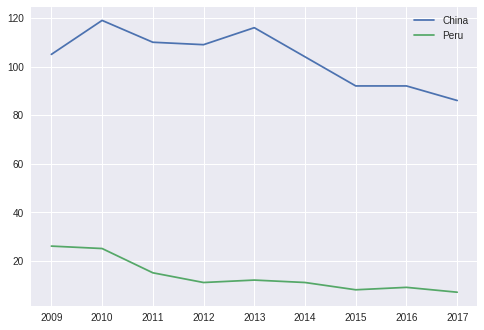

In [45]:
china = ADP[ADP["Reporting Economy"] == "China"]
Peru = ADP[ADP["Reporting Economy"] == "Peru"]
plt.plot(china["year"], china["anti"], label = "China")
plt.plot(Peru["year"], Peru["anti"], label = "Peru")
plt.legend()
plt.show()

**Anti-Dumping Measures Initiated and in Force by Major Country**

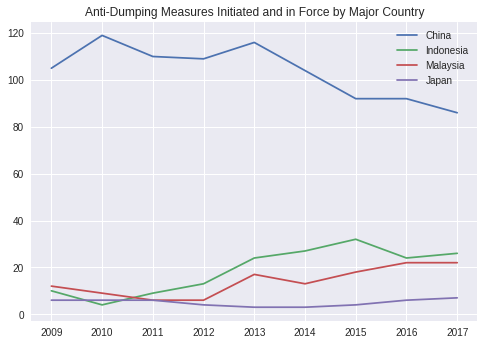

In [46]:
china = ADP[ADP["Reporting Economy"] == "China"]
Indonesia= ADP[ADP["Reporting Economy"] == "Indonesia"]
Malaysia = ADP[ADP["Reporting Economy"] == "Malaysia"]
Japan = ADP[ADP["Reporting Economy"] == "Japan"]
plt.plot(china["year"], china["anti"], label = "China")
plt.plot(Indonesia["year"], Indonesia["anti"], label = "Indonesia")
plt.plot(Malaysia["year"], Malaysia["anti"], label = "Malaysia")
plt.plot(Japan["year"], Japan["anti"], label = "Japan")
plt.title("Anti-Dumping Measures Initiated and in Force by Major Country")
plt.legend()
plt.show()

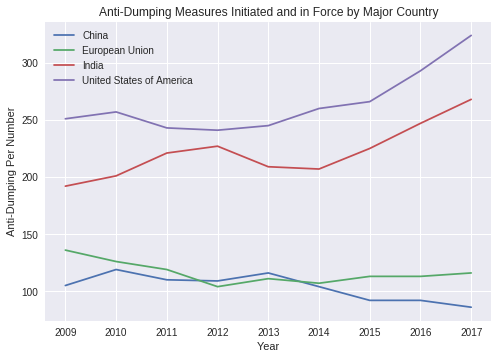

In [47]:
##資料視覺化
anti_sum_ser_list = ["China", "European Union", "India", "United States of America"]
for anti_sum_ser in anti_sum_ser_list:
  subset_df = ADP[ADP["Reporting Economy"] == anti_sum_ser]
  plt.plot(subset_df["year"], subset_df["anti"], label = anti_sum_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Anti-Dumping Per Number")
plt.title("Anti-Dumping Measures Initiated and in Force by Major Country")
plt.show()

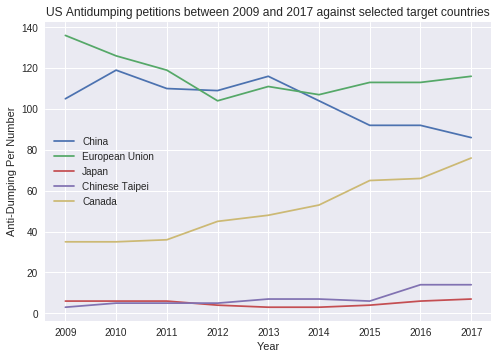

In [48]:
anti_sum_ser_list = ["China", "European Union","Japan", "Chinese Taipei", "Canada"]
for anti_sum_ser in anti_sum_ser_list:
  subset_df = ADP[ADP["Reporting Economy"] == anti_sum_ser]
  plt.plot(subset_df["year"], subset_df["anti"], label = anti_sum_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Anti-Dumping Per Number")
plt.title("US Antidumping petitions between 2009 and 2017 against selected target countries")
plt.show()

Top 10 GDP in Asia
China, India, Japan, Russia, Indonesia, Turkey, South Korea, Saudi Arabia, Iran, Thailand

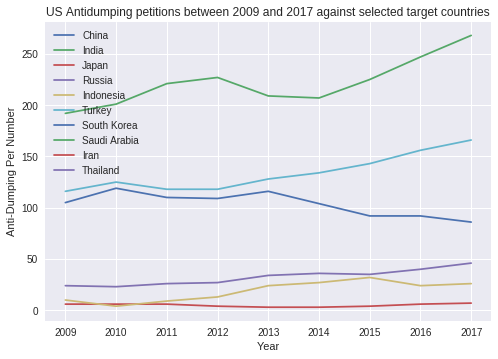

In [49]:
anti_sum_ser_list = ["China", "India","Japan","Russia","Indonesia","Turkey","South Korea","Saudi Arabia","Iran","Thailand"]
for anti_sum_ser in anti_sum_ser_list:
  subset_df = ADP[ADP["Reporting Economy"] == anti_sum_ser]
  plt.plot(subset_df["year"], subset_df["anti"], label = anti_sum_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Anti-Dumping Per Number")
plt.title("US Antidumping petitions between 2009 and 2017 against selected target countries")
plt.show()

## GDP

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

excel_data_url = "API_NY.GDP.MKTP.KD.ZG_DS2_en_excel_v2_10224659.xls"
GDP = pd.read_excel(excel_data_url, usecols="A, BB:BJ", skiprows=3, nrows=268)
GDP.head()

,Country Name,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,21.020649,8.433290,6.113685,14.434741,3.900575,2.690522,1.310040,2.366712,2.595542
2,Angola,2.412910,3.452875,3.873331,5.177594,6.842717,4.703971,2.999747,-0.813494,0.721699
3,Albania,3.352610,3.710058,2.550161,1.419968,1.000755,1.774369,2.218752,3.352159,3.841364
4,Andorra,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.873197


In [53]:
GDP = pd.melt(GDP,id_vars=["Country Name"], value_vars=["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], var_name='year', value_name='gdp')
GDP.head()

,Country Name,year,gdp
0,Aruba,2009,-5.653502
1,Afghanistan,2009,21.020649
2,Angola,2009,2.412910
3,Albania,2009,3.352610
4,Andorra,2009,-3.690654


In [54]:
year = GDP.groupby("year")
gdp_mean_ser = year["gdp"].mean().sort_values(ascending=False)
gdp_mean_ser.values

array([4.47260453, 3.79061556, 3.65218708, 3.48270128, 3.4649446 ,
       3.33083313, 2.82425033, 2.81632941, 0.10349502])

In [55]:
gdp_mean_ser.index

Index(['2010', '2011', '2012', '2013', '2017', '2014', '2015', '2016', '2009'], dtype='object', name='year')

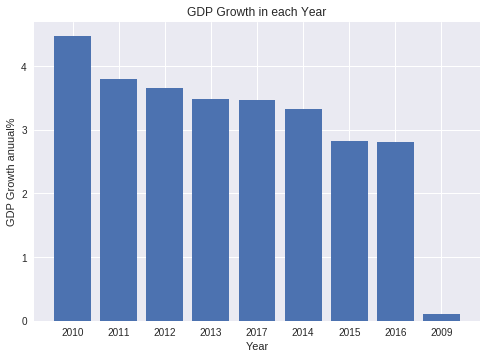

In [57]:
gdp_amount = len(gdp_mean_ser.values)
plt.bar(range(gdp_amount), gdp_mean_ser.values)
plt.xticks(range(gdp_amount), gdp_mean_ser.index)
plt.title("GDP Growth in each Year")
plt.xlabel("Year")
plt.ylabel("GDP Growth anuual%")
plt.show()

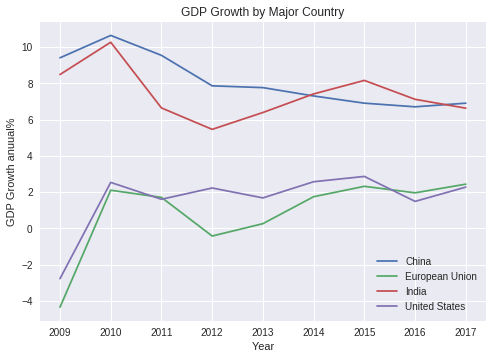

In [60]:
gdp_mean_ser_list = ["China", "European Union", "India", "United States"]
for gdp_mean_ser in gdp_mean_ser_list:
  subset_df = GDP[GDP["Country Name"] == gdp_mean_ser]
  plt.plot(subset_df["year"], subset_df["gdp"], label = gdp_mean_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("GDP Growth anuual%")
plt.title("GDP Growth by Major Country")
plt.show()

##try&error

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

excel_data_url = "imf-dm-export-20190109.xls"
GDP = pd.read_excel(excel_data_url, usecols="A:G",skiprows=4, nrows=230)
GDP

_locate_stream(Workbook): seen
    0  5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
   20  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
  340= 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 
  360  4 4 4 4 4 4 4 4 4 4 4 3 2 2 2 


CompDocError: ignored

In [30]:
import matplotlib.pyplot as plt

x = range(100)
y1 = [elem*2 for elem in x]
plt.plot(subset_df["year"], subset_df["anti"], label = anti_sum_ser)

y2 = [elem**2 for elem in x]
plt.plot(subset_df["year"], subset_df["Imports of goods and services"], label = igs_mean_ser)
plt.show()

KeyError: ignored

In [0]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure()
x=pd.Series(np.exp(np.arange(20)))
p1=x.plot(label=u'原始数据图')
plt.ylabel('正常坐标')
x2=pd.Series(np.log10(x)) #np.log()是以e为底的
p2=x2.plot(secondary_y=True,style='--',color='r',)
plt.yticks(plt.yticks()[0],['$10^%d$'%w for w in range(len(plt.yticks()[0]))])
#x.plot(logy=True,label=u'对数数据图',legend=True,secondary_y=True,style='--',color='r') #这里不能用这个，因为它会同时改变图中的x坐标轴和y坐标轴
plt.ylabel('指数坐标')
blue_line = mlines.Line2D([],[],linestyle='-',color='blue',markersize=2, label=u'原始数据图')
red_line= mlines.Line2D([],[],linestyle='--',color='red',markersize=2, label=u'对数数据图')
plt.legend(handles=[blue_line,red_line],loc='upper left')
plt.grid(True)
plt.show()

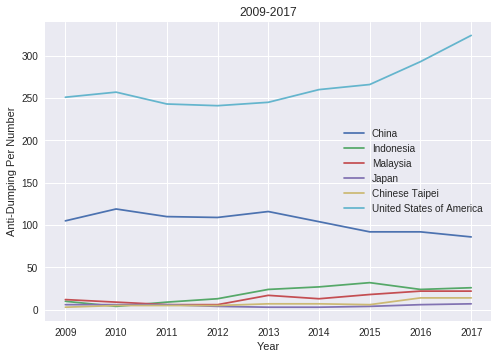

In [0]:
anti_sum_ser_list = ["China", "Indonesia", "Malaysia", "Japan", "Chinese Taipei", "United States of America"]
for anti_sum_ser in anti_sum_ser_list:
  subset_df = ADP[ADP["Reporting Economy"] == anti_sum_ser]
  plt.plot(subset_df["year"], subset_df["anti"], label = anti_sum_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Anti-Dumping Per Number")
plt.title("Anti-Dumping Measures Initiated and in Force by Major Country")
plt.show()

In [0]:
anti_sum_ser_list = ["China", "Indonesia", "Malaysia", "Japan", "Chinese Taipei", "United States of America"]
for anti_sum_ser in anti_sum_ser_list:
  subset_df = ADP[ADP["Reporting Economy"] == anti_sum_ser]
  plt.plot(subset_df["year"], subset_df["anti"], label = anti_sum_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Anti-Dumping Per Number")
plt.title("2009-2017")
plt.show()

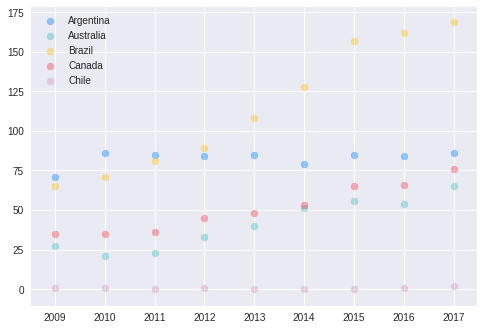

In [0]:
hex_colors = ["#0084ff", "#44bec7", "#ffc300", "#fa3c4c", "#d696bb"]
anti_sum_ser = ADP["Reporting Economy"].unique()
for col, cont in zip(hex_colors, anti_sum_ser):
  subset_df = ADP[ADP["Reporting Economy"] == cont]
  plt.scatter(subset_df["year"], subset_df["anti"], color=col, alpha=0.4, label=cont)

plt.legend()
plt.show()

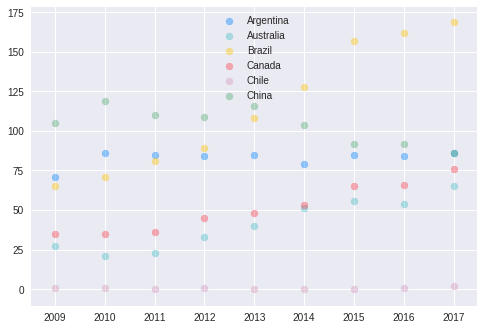

In [0]:
hex_colors = ["#0084ff", "#44bec7", "#ffc300", "#fa3c4c", "#d696bb","#51ab70"]
anti_sum_ser = ADP["Reporting Economy"].unique()
for col, cont in zip(hex_colors, anti_sum_ser):
  subset_df = ADP[ADP["Reporting Economy"] == cont]
  plt.scatter(subset_df["year"], subset_df["anti"], color=col, alpha=0.4, label=cont)

plt.legend()
plt.show()

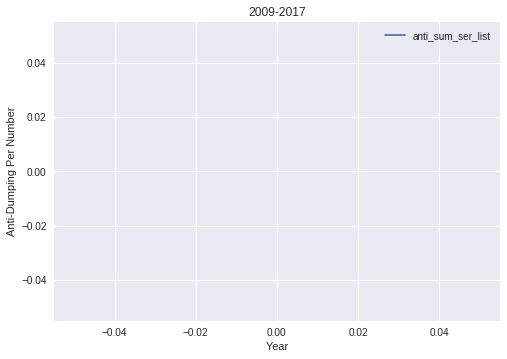

In [0]:
anti_sum_ser_list =["anti_sum_ser_list"]
for anti_sum_ser in anti_sum_ser_list:
  subset_df = ADP[ADP["Reporting Economy"] == anti_sum_ser]
  plt.plot(subset_df["year"], subset_df["anti"], label = anti_sum_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Anti-Dumping Per Number")
plt.title("2009-2017")
plt.show()

### IGS

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

excel_data_url = "API_NE.IMP.GNFS.ZS_DS2_en_excel_v2_10225106.xls"
IGS = pd.read_excel(excel_data_url, usecols="A:B,BB:BJ", skiprows=3, nrows=268)
IGS

,Country Name,Country Code,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,76.276578,74.816343,86.436355,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,42.199228,44.943478,44.193948,39.142397,49.757775,45.773877,48.801615,49.024977,NaN
2,Angola,AGO,55.408683,42.921224,42.162964,40.234207,39.379870,42.245599,36.878451,29.417168,27.650831
3,Albania,ALB,49.854168,48.564000,51.977048,47.572687,46.957428,47.194855,44.533632,45.745845,46.553568
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,42.270099,38.411162,37.073235,37.581238,39.424925,41.789089,44.151639,41.158256,40.292234
6,United Arab Emirates,ARE,73.808626,63.571042,62.016460,64.820700,64.909644,68.935192,74.350827,75.744634,72.426685
7,Argentina,ARG,14.496142,16.037190,16.756946,14.288683,14.716756,14.001315,11.780574,13.538081,13.835816
8,Armenia,ARM,43.004401,45.317192,47.354012,48.400022,48.197069,47.046546,41.865269,42.769875,50.399512
9,American Samoa,ASM,82.005900,93.229167,97.386760,99.844720,100.000000,105.443235,99.696510,93.465046,NaN


In [0]:
IGS = pd.melt(IGS,id_vars=["Country Name"], value_vars=["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"], var_name='year', value_name='Imports of goods and services')
IGS

,Country Name,year,Imports of goods and services
0,Aruba,2009,76.276578
1,Afghanistan,2009,42.199228
2,Angola,2009,55.408683
3,Albania,2009,49.854168
4,Andorra,2009,NaN
5,Arab World,2009,42.270099
6,United Arab Emirates,2009,73.808626
7,Argentina,2009,14.496142
8,Armenia,2009,43.004401
9,American Samoa,2009,82.005900


In [0]:
year = IGS.groupby("year")
igs_mean_ser = year["Imports of goods and services"].mean().sort_values(ascending=False)
igs_mean_ser.values

array([48.73546783, 48.04013275, 47.90089038, 47.85624723, 46.55150916,
       46.14062127, 45.51117523, 45.05486357, 44.59056285])

In [0]:
igs_mean_ser.index

Index(['2011', '2012', '2013', '2014', '2010', '2015', '2017', '2016', '2009'], dtype='object', name='year')

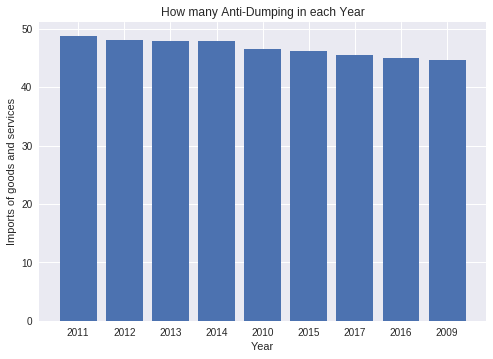

In [0]:
igs_amount = len(igs_mean_ser.values)
plt.bar(range(igs_amount), igs_mean_ser.values)
plt.xticks(range(igs_amount), igs_mean_ser.index)
plt.title("How many Anti-Dumping in each Year")
plt.xlabel("Year")
plt.ylabel("Imports of goods and services")
plt.show()

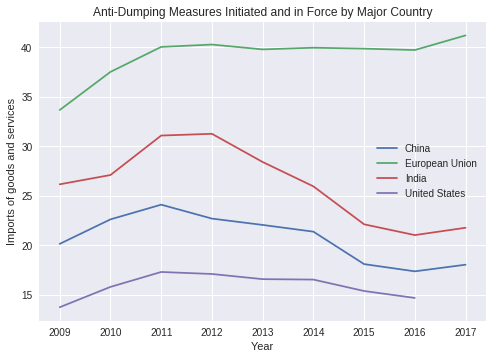

In [0]:
igs_mean_ser_list = ["China", "European Union", "India", "United States"]
for igs_mean_ser in igs_mean_ser_list:
  subset_df = IGS[IGS["Country Name"] == igs_mean_ser]
  plt.plot(subset_df["year"], subset_df["Imports of goods and services"], label = igs_mean_ser)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Imports of goods and services")
plt.title("Anti-Dumping Measures Initiated and in Force by Major Country")
plt.show()